Abalone Case Study.............
You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [15]:
! pip install scikit-learn
import pandas as pd

In [16]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In the Abalone case study: Number of the rings will give the age of the Abalone.
    we have to predict the number of rings based on the given attributes in the dataset.
    Rings will be the output label.

In [10]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [12]:
df.shape

(4177, 9)

The dataset has 9 headers and 4177 rows.

In [13]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [14]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

From the above analysis, it can be seen that we have zero null values.
By observing the value of mean and standard deviation, it seems that data is scattered.

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

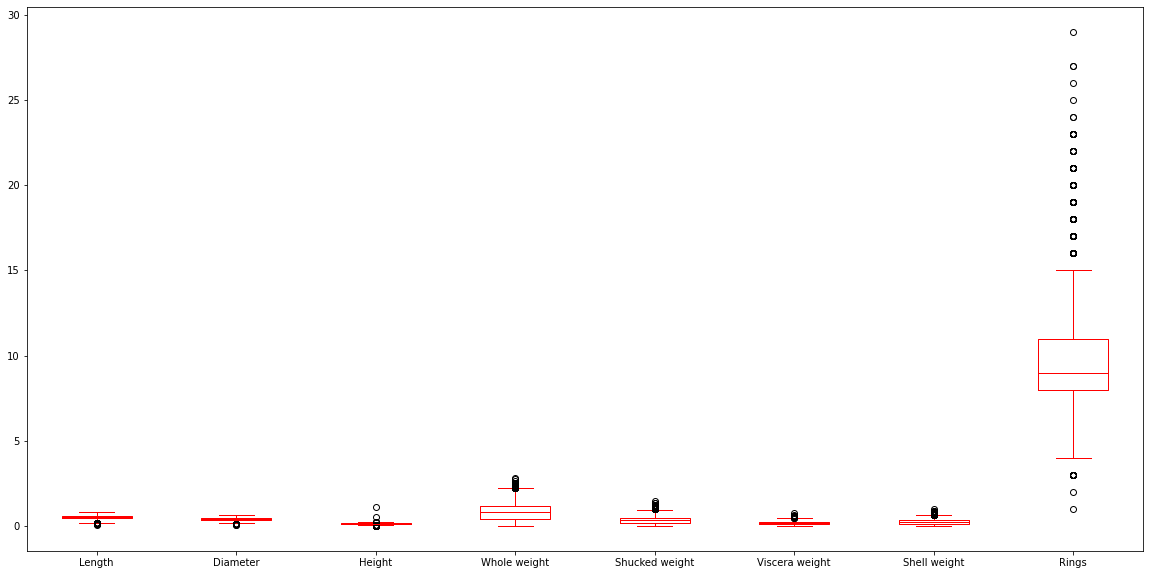

In [37]:
df.plot(kind='box', figsize=(20,10), color='r')

from the above box graph:
    1. Lots of outliers in Rings
    2. Data in other attributes is closely packed.

In [38]:
from pandas.plotting import scatter_matrix

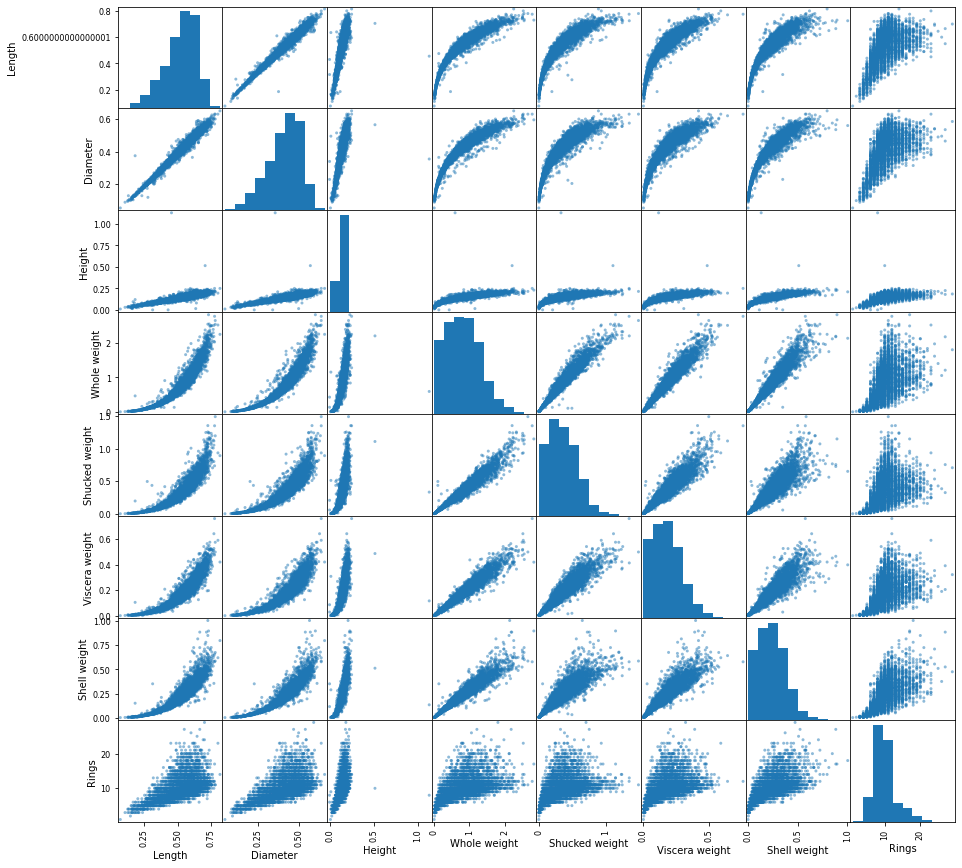

In [48]:
scatter_matrix(df, figsize=(15,15))
plt.show()

From the above scatter plot, it can be concluded that the data is linearly related to each other

<AxesSubplot:xlabel='Length', ylabel='Rings'>

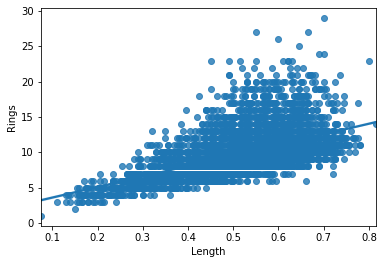

In [70]:
sns.regplot(x='Length', y='Rings', data=df)

Length of abalone and number of rings are linearly related to each other

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

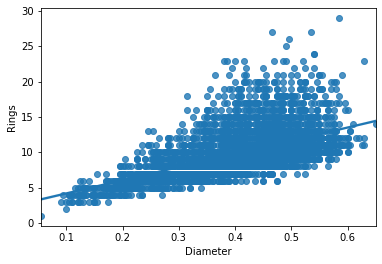

In [71]:
sns.regplot(x='Diameter', y='Rings', data=df)

<AxesSubplot:xlabel='Height', ylabel='Rings'>

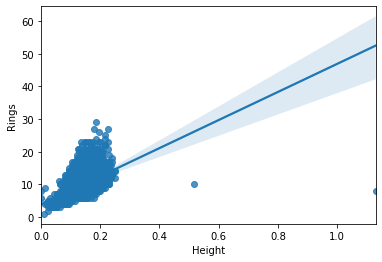

In [72]:
sns.regplot(x='Height', y='Rings', data=df)

From the above graph we can say that the height of abalone is restricted, except two outliers, also it is linearly related.

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

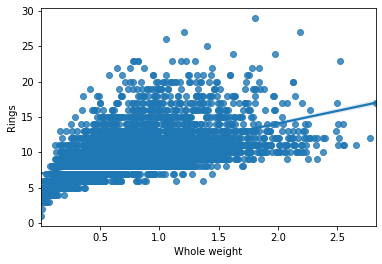

In [73]:
sns.regplot(x='Whole weight', y='Rings', data=df)

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

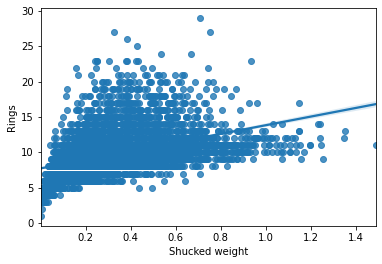

In [74]:
sns.regplot(x='Shucked weight', y='Rings', data=df)

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

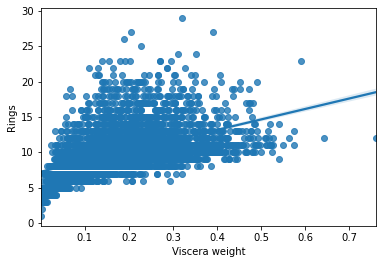

In [75]:
sns.regplot(x='Viscera weight', y='Rings', data=df)

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

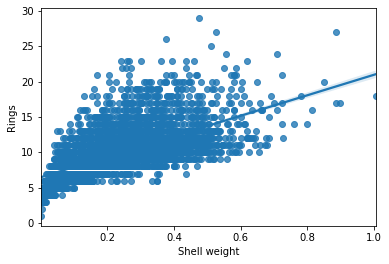

In [76]:
sns.regplot(x='Shell weight', y='Rings', data=df)

In [63]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

From the value count we can conclude that the dataset is uniformly distributed among Male, Female and Infant

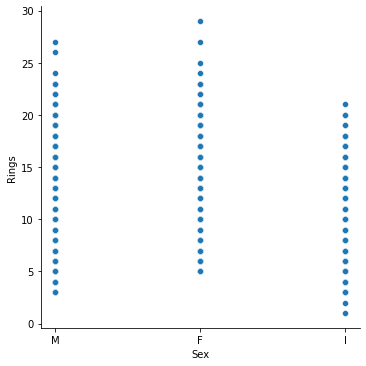

In [78]:
sns.relplot(x='Sex', y='Rings',data=df)

In [79]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

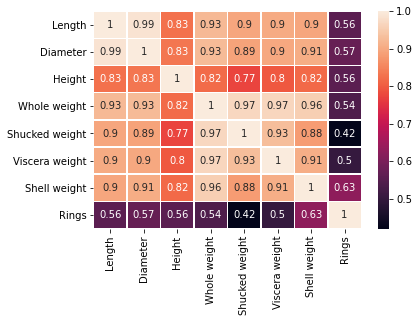

In [80]:
sns.heatmap(df.corr(),annot=True, linewidth=0.5)

From the correlation data we can conclude that the attributes are strongly corelated to each other. And from scatter plot we can see the trend of data, as they are linearly related.
We can drop the Sex data, as the data is uniformly distributed and there would be no biasness in the model due to Sex column.
Also Height has least correlation.

In [83]:
df=df.drop(columns=('Sex'))

In [84]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [85]:
Scaler=StandardScaler()

In [86]:
y=df['Rings']
x=df.drop(columns=['Rings'])

<AxesSubplot:>

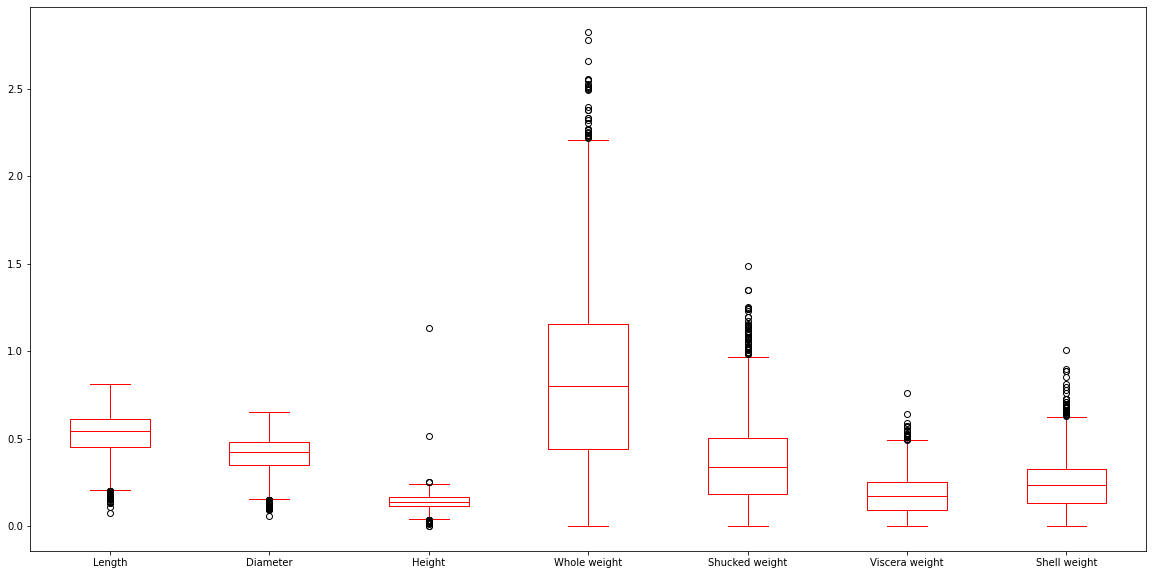

In [87]:
x.plot(kind='box', figsize=(20,10), color='r')

In [143]:
x.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [144]:
x.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000


<AxesSubplot:>

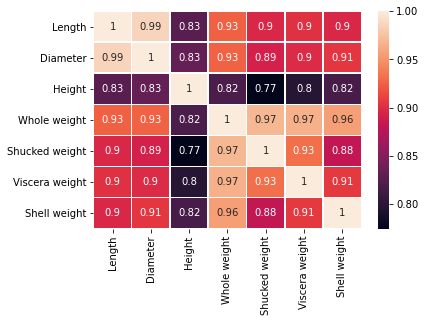

In [145]:
sns.heatmap(x.corr(),annot=True, linewidth=0.5)

From the above graph we can conclude that
1. Height least correlated
2. max value of height is more than the 75% of data
3. From the box diagram it can be seen that it has extreme outliers


In [134]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [147]:
x1=x.drop(columns=['Height'])
x1

,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...
4172,0.565,0.450,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,1.0945,0.5310,0.2610,0.2960


<AxesSubplot:>

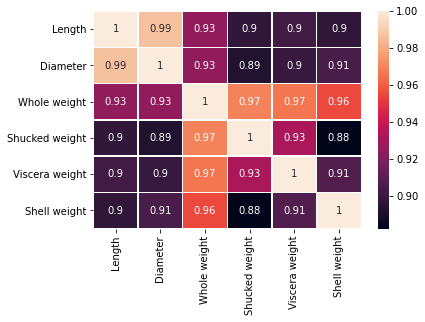

In [148]:
sns.heatmap(x1.corr(),annot=True, linewidth=0.5)

<AxesSubplot:>

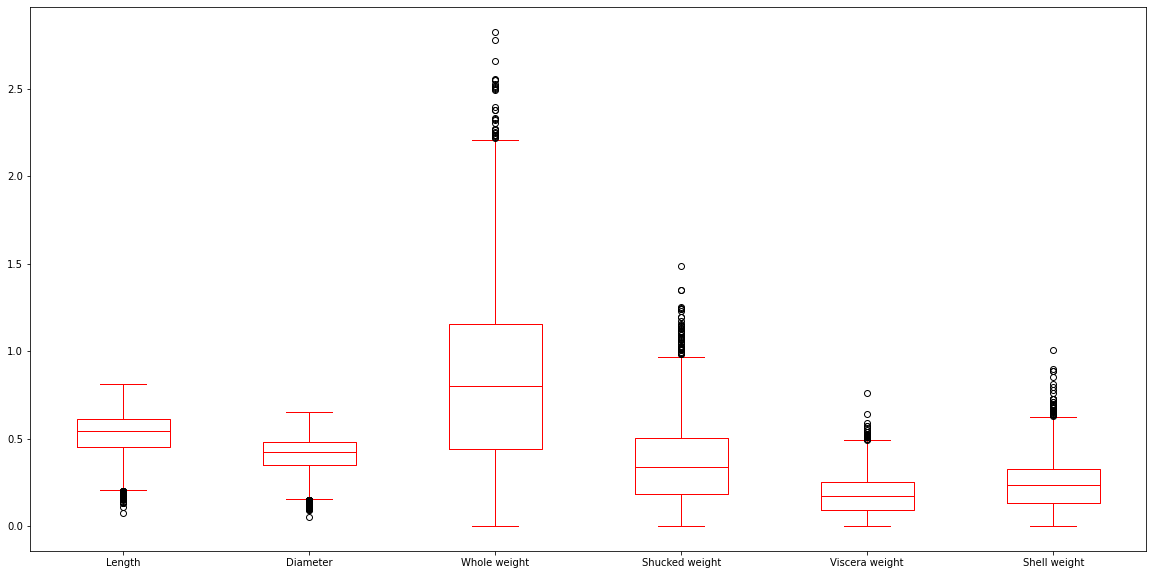

In [149]:
x1.plot(kind='box', figsize=(20,10), color='r')

In [150]:
scaler=StandardScaler()
x1_scaled=scaler.fit_transform(x)
x1_scaled

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [152]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y_train,y_test=train_test_split(x1_scaled,y, test_size=0.25,random_state=323)
y_train.head()

693      9
4102    11
494     17
3697    12
1386    12
Name: Rings, dtype: int64

In [155]:
from sklearn.linear_model import LinearRegression
y_train.head()
regression= LinearRegression()
regression.fit(x1_train, y_train)

LinearRegression()

In [158]:
regression.score(x1_train, y_train)

0.5323065728144158

In [159]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [160]:
svm=SVC()
svm.fit(x1_train, y_train)
svm.score(x1_train, y_train)

0.2889527458492976

In [165]:
rf=RandomForestClassifier(n_estimators=3)
rf.fit(x1_train,  y_train)
rf.score(x1_train, y_train)

0.8298212005108557

In [166]:
import pickle

In [167]:
filename='abalone.pickle'
pickle.dump(rf,open(filename,'wb'))